# Naive Bayes
- Another very popular Supervised Classification algorithm is Naive Bayes.
- Before diving deep lets understand What does Naive and Bayes signify.
    1. This algorithm is called “Naive” because it makes a naive assumption that each feature is independent of other features which is not true in real life.
    2. As for the “Bayes” part, it refers to the statistician and philosopher, Thomas Bayes and the theorem named after him, Bayes’ theorem, which is the base for Naive Bayes Algorithm.
    
 ## Befor Going Naive Bayes we see about Bayes Therom
 
 ### Bayes Theorm
 
 <img src="1.jpeg" width=500>
 
     Where,
     * P(A|B) is the probability of hypothesis A given the data B. This is called the posterior probability.
     * P(B|A) is the probability of data B given that the hypothesis A was true.
     * P(A) is the probability of hypothesis A being true (regardless of the data). This is called the prior probability of A.
     * P(B) is the probability of the data (regardless of the hypothesis).
     *  P(A|B) or P(B|A) are conditional probabilities P(B|A) = P(A and B)/P(A)

## Types of Naive Bayes Classifier:
 1. Multinomial Naive Bayes
 2. Bernoulli Naive Bayes
 3. Gaussian Naive Bayes
 
 a. Multinomial Naive Bayes: This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.
 
 b. Bernoulli Naive Bayes: This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.
 
 c. Gaussian Naive Bayes : When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

## How Naive Bayes algorithm works?

Let’s understand it using an clasic example. 

Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

* Step 1: Convert the data set into a frequency table
* Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.
* Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

See the below example

This is the problem statement :
<img src="2.jpg" width="500">

Here is the Answer:
<img src="03.jpg" width="500">

## Applications of Naive Bayes Algorithm :
- Naive Bayes is widely used for text classification
- Another example of Text Classification where Naive Bayes is mostly used is Spam Filtering in Emails
- Other Examples include Sentiment Analysis ,Recommender Systems etc

### Now Implement This Algorithm

## Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, [,8]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Naive Bayes model on the Training set

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [33]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[130   0]
 [  0  62]]


## Visualising the Training set results

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11592\2643083737.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


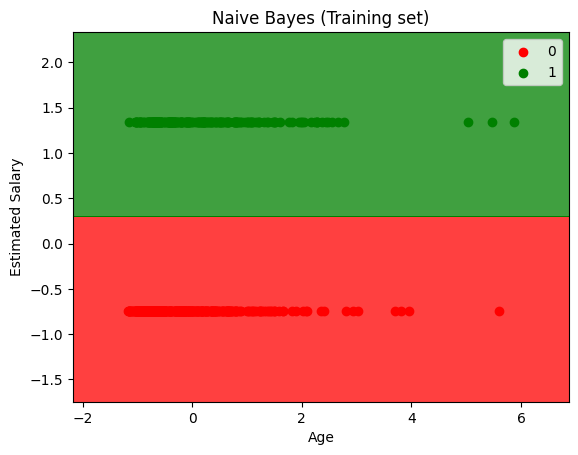

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11592\664088336.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


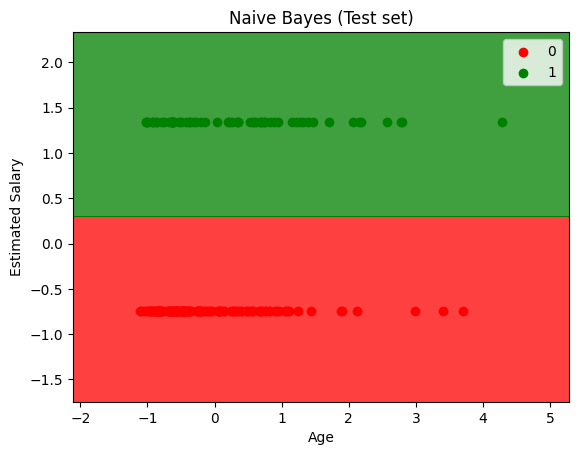

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()